LAB 9
-

 a) Can you perform a simple linear regression (from scratch) analysis to determine if there is a relationship between the phone's  pixel density and its rating using line search approach?

b) What is the slope and intercept of the regression line, and what is the Mean Squared Error (MSE) for this model?

c) Plot Cost function (both as surface as well as contour) and best fit line.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [77]:
df = pd.read_csv('mobile_data (1).csv')
df

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
336,465,220,5.00,141,1,1.2,67.20,142.7,16,2420,5,3.8
337,466,401,5.50,165,4,1.8,69.95,156.5,64,3000,13,3.9
338,468,282,5.20,160,3,1.4,68.52,149.7,16,3000,8,4.1
339,470,218,4.50,156,1,1.3,63.93,132.0,8,1800,2,3.6


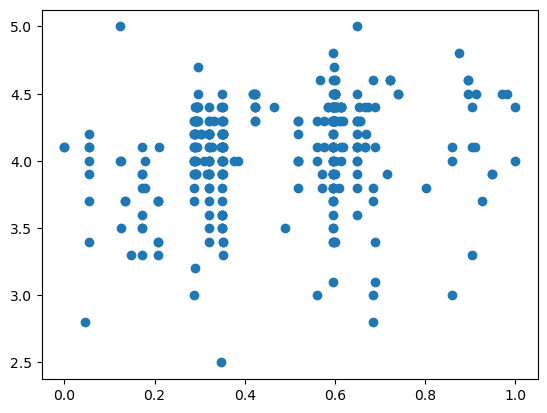

In [78]:
# going with convention
x = (df['Pixel Density']-min(df['Pixel Density']))/(max(df['Pixel Density'])-min(df['Pixel Density']))
y = np.array(df['Rating'])

plt.scatter(x, y)

In [79]:
# Hypothesis functioin
def h(w0,w1):
    return w0+w1*x

# Loss function
def J(w0,w1,x,y):
    return np.mean((w0+w1*x-y )**2)/2

In [80]:
# partial derivative w.r.t to w0
def dJw0(w0,w1,x,y):
    return np.mean((w0+w1*x-y)) 

# partial derivative w.r.t to w1
def dJw1(w0,w1,x,y):
    return np.mean(((w0+w1*x-y))*x)

In [81]:
def bracketing_method_alpha(a, b, w0,w1,dw0,dw1,x,y):
    n = 50
    d_alpha = (b-a)/n
    alpha1 = a
    alpha2 = a+d_alpha
    alpha3 = a+2*d_alpha
    #i=0
    
    w01 = w0+dw0*alpha1
    w02 = w0+dw0*alpha2
    w03 = w0+dw0*alpha3
    
    
    w11 = w1+dw1*alpha1
    w12 = w1+dw1*alpha2
    w13 = w1+dw1*alpha3
    
    count = -1
    while(alpha3<=b):
        #i+=1
        if (J(w01,w11,x,y) >= J(w02,w12,x,y)) and (J(w02,w12,x,y)<= J(w03,w13,x,y)):
            count =0
            break
        else:
            alpha1 = alpha2
            alpha2 = alpha3
            alpha3 = alpha1+2*d_alpha
            
            w01 = w0+dw0*alpha1
            w02 = w0+dw0*alpha2
            w03 = w0+dw0*alpha3
    
    
            w11 = w1+dw1*alpha1
            w12 = w1+dw1*alpha2
            w13 = w1+dw1*alpha3
            
    if (count!=-1):
        return alpha2
    else:
        return 0    

In [82]:
def line_reg(w0,w1,x,y,e):
    for i in range(100):
        if (abs(dJw0(w0,w1,x,y))<=e and abs(dJw1(w0,w1,x,y))<=e):
            break
        else:
            dw0 = -dJw0(w0,w1,x,y)
            dw1 = -dJw1(w0,w1,x,y)
            alpha= bracketing_method_alpha(-10,10,w0,w1,dw0,dw1,x,y)
            w0 = w0 - alpha*dJw0(w0, w1,x, y)
            w1 = w1 - alpha*dJw1(w0, w1,x, y)
    #print(lis_w1)
    return w0,w1

In [96]:
(w0,w1)= line_reg(3,0.012,x,y,0.0001)
print(w0)
print(w1)

3.9524695750182914
0.26213105957811994


In [84]:
MSE = J(3.9524695750182914,0.26213105957811994,x,y)
MSE

0.06796628634943415

In [85]:
def cost_fun(w0,w1,x,y):
    j=0
    for i in range(len(x)):
        j+=(w1*x[i]+w0-y[i])**2
    j=j/(2*len(x))
    return j

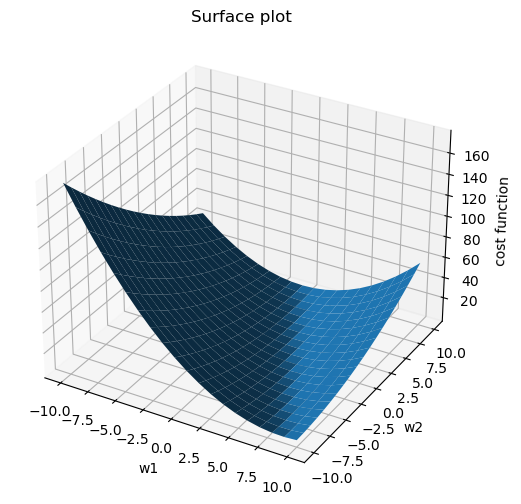

In [98]:
w0=np.linspace(-10,10,20)
w1=np.linspace(-10,10,20)
W0,W1=np.meshgrid(w0,w1)
j=cost_fun(W0,W1,x,y)
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(W0,W1,j)
ax.set(xlabel='w1',ylabel='w2',zlabel='cost function',title='Surface plot')
plt.show()
ax.grid()

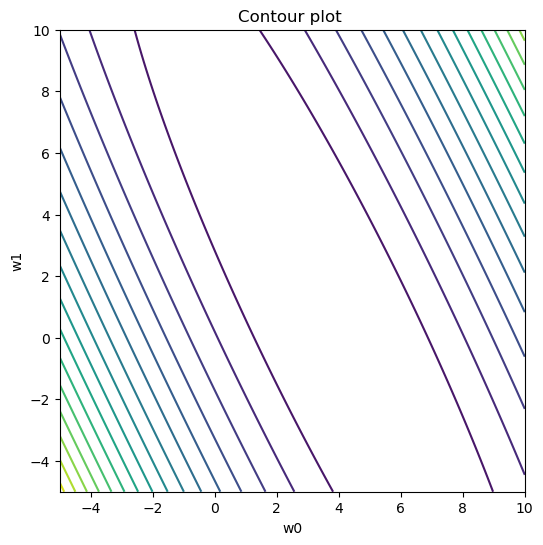

In [90]:
w0=np.linspace(-5,10,200)
w1=np.linspace(-5,10,200)
W0,W1=np.meshgrid(w0,w1)
j=cost_fun(W0,W1,x,y)
fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.contour(W0,W1,j,levels=20)
ax.set(xlabel='w0',ylabel='w1',title='Contour plot ')
plt.show()
ax.grid()

Text(0.5, 1.0, 'Pixel density vs rating')

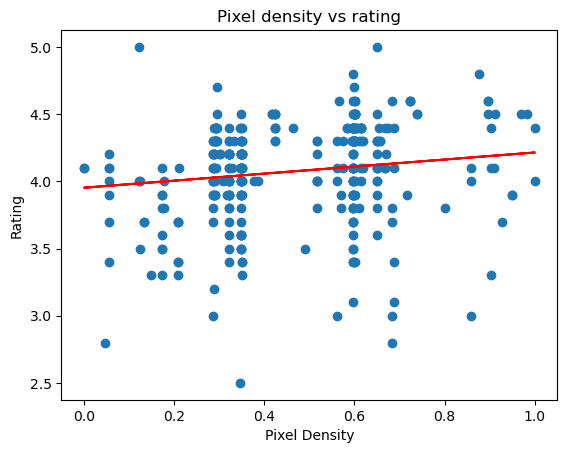

In [92]:
plt.scatter(x,y)
y_pred=0.26213105957811994*x+3.9524695750182914
plt.plot(x,y_pred,'r')
plt.xlabel('Pixel Density')
plt.ylabel('Rating')
plt.title('Pixel density vs rating')